In [ ]:
# Imports

import car
from auto.capabilities import acquire, release, list_caps
from car.motors import set_throttle, set_steering
from auto import console
import time


import numpy as np
import cv2
import os

In [ ]:
# Computer Vision constants
cv2.setNumThreads(0)

blue = np.array([112,121, 189])

diff = 30
lower = blue - diff
upper = blue + diff
lower = np.clip(lower, 0, 255)
upper = np.clip(upper, 0, 255)

crop_height = 70
crop_left = 60
crop_right = 60

In [ ]:
# Functions

def crop(img):
    """
    Camera captures 240 pixels of height and 320 of width
    Shape is (240, 320, 3)
    """
    return img[-crop_height:, crop_left:-crop_right]


def scale(img, scalePercent):
    # Calculate the new dimensions
    width = int(img.shape[1] * scalePercent)
    height = int(img.shape[0] * scalePercent)
    newSize = (width, height)

    # Resize the image:
    img = cv2.resize(img, newSize, None, None, None, cv2.INTER_AREA)
    return img


def percentBlue(img, scalePercent=1):
    # Convert the image to HSV:
    #hsvImage = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    rgbImage = img
    #cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Create the HSV mask
    #hsvMask = cv2.inRange(hsvImage, lower, upper)
    
    rgbMask = cv2.inRange(rgbImage,lower, upper)
    # AND mask & input image:
    # rgbOutput = cv2.bitwise_and(img, img, mask=rgbMask)
    
    # You can use the mask to count the number of white pixels.
    # Remember that the white pixels in the mask are those that
    # fall in your defined range, that is, every white pixel corresponds
    # to a blue pixel. Divide by the image size and you got the
    # percentage of blue pixels in the original image:
    ratio_blue = cv2.countNonZero(rgbMask)/(img.size/3)

    # This is the color percent calculation, considering the resize I did earlier.
    colorPercent = (ratio_blue * 100) / scalePercent

    return colorPercent

In [ ]:
# Racing constants

turns = []
numLaps = 10
maxThrottle = 10

In [ ]:
# Custom logic

gyroscope = acquire('Gyroscope_accum')

onStraight = True
currentOffset = 0 # Steer offset from straight
turnNumber = 0 # Index into turns array
lap = 0

blueThreshold = 1.0 # As a percent

def start():
    return 0, max_throttle


def loop():
    d_steer = 0
    steer_direction = 1
    if onStraight:
        z = gyroscope.read()[2]
        currentOffset = -z
        d_steer = currentOffset
        
#         frame = car.capture()
#         img = crop(frame)
#         percent = percentBlue(img)
#         if percent > blueThreshold:
#             d_steer += 10
#             if currentOffset < 0.0:
#                 steer_direction = 1
#             else:
#                 steer_direction = -1
    else:
        pass
    
    return d_steer * steer_direction, maxThrottle

In [ ]:
# steer, throttle = start()

# while lap < 10:
#     if turnNumber != 0 and turnNumber % len(turns) == 0:
#         lap += 1

#     d_steer, d_throttle = loop()
#     steer += d_steer
#     throttle += d_throttle
#     set_steering(steer)
#     set_throttle(throttle)
#     time.sleep(0.1) # Each command runs for 1 second
    
# release('Gyroscope_accum')

while lap < 4:
    d_steer, maxThrottle = loop()
    throttle = 50
    set_throttle(throttle)
    set_steering(d_steer)
    time.sleep(0.5)
    lap += 1
    
release('Gyroscope_accum')
    

Plotting 1 frame...


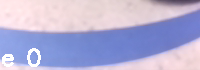

In [8]:
car.plot(img)